# Banking Churn Notebook
This notebook looks at banking customer information and tries to predict customer churn


## Dependencies

In [72]:
import pandas as pd
import numpy as np
import matplotlib as plt

## 1. Load the data files

In [73]:
# The code was removed by DSX for sharing.

[Row(Cust ID='ID1001', Number of Late payments='0', Number of credit applications='3', Declared Bankruptcy In Past 7 Yrs='No', Average Monthly Fee='134', Credit Score='821'),
 Row(Cust ID='ID1002', Number of Late payments='2', Number of credit applications='5', Declared Bankruptcy In Past 7 Yrs='No', Average Monthly Fee='120', Credit Score='821'),
 Row(Cust ID='ID1003', Number of Late payments='34', Number of credit applications='14', Declared Bankruptcy In Past 7 Yrs='No', Average Monthly Fee='122', Credit Score='853'),
 Row(Cust ID='ID1004', Number of Late payments='26', Number of credit applications='39', Declared Bankruptcy In Past 7 Yrs='No', Average Monthly Fee='141', Credit Score='821'),
 Row(Cust ID='ID1005', Number of Late payments='0', Number of credit applications='0', Declared Bankruptcy In Past 7 Yrs='No', Average Monthly Fee='144', Credit Score='853')]

In [74]:

df_standard = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('Bank_Standard_Data.csv', 'dsampbademos2018a7575ee3890845b989908d1e2f94952b'))
df_standard.take(5)


[Row(Cust ID='ID1001', Satisfaction='4.5', Default='0', Average Cash Balance='1000', Age='31', Age Range='30-39', Gender='Male', Number of Products='1', Cust Acquisition Year='2007', No of Unique Products='28', No of Unique Products Grouped='21 to 30', Equities Balance='7000', Initial Mortgage Amt='300K+', Address Changes='2', Household ID='1', Clients in household='2', Average Credit Card Balance='7500', Customer type='Corporate', Home Branch City='Dallas/Fort Worth TX', Home Branch State='Texas', Salesperson ID='ID15', Churn='no', Count='1'),
 Row(Cust ID='ID1002', Satisfaction='4', Default='1', Average Cash Balance='1000', Age='56', Age Range='50-59', Gender='Male', Number of Products='2', Cust Acquisition Year='2006', No of Unique Products='41', No of Unique Products Grouped='41 to 50', Equities Balance='3000', Initial Mortgage Amt='300K+', Address Changes='0', Household ID='2', Clients in household='1', Average Credit Card Balance='6000', Customer type='Corporate', Home Branch Cit

## 2. Merge the data files

In [75]:
merged = df_standard.join(df_credit, 'Cust ID', 'inner')

In [76]:
merged.toPandas().head()

,Cust ID,Satisfaction,Default,Average Cash Balance,Age,Age Range,Gender,Number of Products,Cust Acquisition Year,No of Unique Products,...,Home Branch City,Home Branch State,Salesperson ID,Churn,Count,Number of Late payments,Number of credit applications,Declared Bankruptcy In Past 7 Yrs,Average Monthly Fee,Credit Score
0,ID1001,4.5,0,1000,31,30-39,Male,1,2007,28,...,Dallas/Fort Worth TX,Texas,ID15,no,1,0,3,No,134,821
1,ID1002,4,1,1000,56,50-59,Male,2,2006,41,...,Dallas/Fort Worth TX,Texas,ID11,no,1,2,5,No,120,821
2,ID1003,2.5,0,1000,21,20-29,Female,2,2006,8,...,Dallas/Fort Worth TX,Texas,ID12,yes,1,34,14,No,122,853
3,ID1004,4,1,1000,43,40-49,Male,1,2007,9,...,Dallas/Fort Worth TX,Texas,ID11,yes,1,26,39,No,141,821
4,ID1005,5,1,25000,49,40-49,Male,1,2006,14,...,Dallas/Fort Worth TX,Texas,ID12,no,1,0,0,No,144,853


## 3. Operations

In [77]:
print('Number of rows: ')
merged.count()

Number of rows: 


11022

In [78]:
cleaned = merged.withColumnRenamed("Cust ID", "CustID").withColumnRenamed("Average Cash Balance", "AvgCashBalance").withColumnRenamed("Age Range", "AgeRange").withColumnRenamed("Number of Products", "Products").withColumnRenamed("Cust Acquisition Year", "AcqYear").withColumnRenamed("No of Unique Products", "UniqueProducts").withColumnRenamed("No of Unique Products Grouped", "UniqueProductsGrp").withColumnRenamed("Equities Balance", "EquitiesBalance").withColumnRenamed("Initial Mortgage Amt", "MortgageAmt").withColumnRenamed("Address Changes", "AddressChanges").withColumnRenamed("Household ID", "HouseholdID").withColumnRenamed("Clients in household", "ClientsInHome").withColumnRenamed("Average Credit Card Balance", "AvgCCBalance").withColumnRenamed("Customer type", "CustType").withColumnRenamed("Home Branch City", "HomeBranchCity").withColumnRenamed("Home Branch State", "HomeBranchState").withColumnRenamed("Salesperson ID", "SalesID").withColumnRenamed("Number of Late payments", "LatePayments").withColumnRenamed("Number of credit applications", "CreditApplications").withColumnRenamed("Declared Bankruptcy In Past 7 Yrs", "Bankruptcy").withColumnRenamed("Average Monthly Fee", "AvgMonthlyFee").withColumnRenamed("Credit Score", "CreditScore")

cleaned.toPandas().head()

,CustID,Satisfaction,Default,AvgCashBalance,Age,AgeRange,Gender,Products,AcqYear,UniqueProducts,...,HomeBranchCity,HomeBranchState,SalesID,Churn,Count,LatePayments,CreditApplications,Bankruptcy,AvgMonthlyFee,CreditScore
0,ID1001,4.5,0,1000,31,30-39,Male,1,2007,28,...,Dallas/Fort Worth TX,Texas,ID15,no,1,0,3,No,134,821
1,ID1002,4,1,1000,56,50-59,Male,2,2006,41,...,Dallas/Fort Worth TX,Texas,ID11,no,1,2,5,No,120,821
2,ID1003,2.5,0,1000,21,20-29,Female,2,2006,8,...,Dallas/Fort Worth TX,Texas,ID12,yes,1,34,14,No,122,853
3,ID1004,4,1,1000,43,40-49,Male,1,2007,9,...,Dallas/Fort Worth TX,Texas,ID11,yes,1,26,39,No,141,821
4,ID1005,5,1,25000,49,40-49,Male,1,2006,14,...,Dallas/Fort Worth TX,Texas,ID12,no,1,0,0,No,144,853


In [79]:
cleaned.printSchema()

root
 |-- CustID: string (nullable = true)
 |-- Satisfaction: string (nullable = true)
 |-- Default: string (nullable = true)
 |-- AvgCashBalance: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- AgeRange: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Products: string (nullable = true)
 |-- AcqYear: string (nullable = true)
 |-- UniqueProducts: string (nullable = true)
 |-- UniqueProductsGrp: string (nullable = true)
 |-- EquitiesBalance: string (nullable = true)
 |-- MortgageAmt: string (nullable = true)
 |-- AddressChanges: string (nullable = true)
 |-- HouseholdID: string (nullable = true)
 |-- ClientsInHome: string (nullable = true)
 |-- AvgCCBalance: string (nullable = true)
 |-- CustType: string (nullable = true)
 |-- HomeBranchCity: string (nullable = true)
 |-- HomeBranchState: string (nullable = true)
 |-- SalesID: string (nullable = true)
 |-- Churn: string (nullable = true)
 |-- Count: string (nullable = true)
 |-- LatePayments: string (

In [80]:
cleaned = cleaned.select(
    cleaned.CustID,
    cleaned.Satisfaction.cast("float"),
    cleaned.Default.cast("int"),
    cleaned.AvgCashBalance.cast("float"),
    cleaned.Age.cast("int"),
    cleaned.AgeRange,
    cleaned.Gender,
    cleaned.Products.cast("int"),
    cleaned.AcqYear,
    cleaned.UniqueProducts.cast("int"),
    cleaned.UniqueProductsGrp,
    cleaned.EquitiesBalance.cast("float"),
    cleaned.MortgageAmt.cast("float"),
    cleaned.AddressChanges.cast("int"),
    cleaned.HouseholdID,
    cleaned.ClientsInHome.cast("int"),
    cleaned.AvgCCBalance.cast("float"),
    cleaned.CustType,
    cleaned.HomeBranchCity,
    cleaned.HomeBranchState,
    cleaned.SalesID,
    cleaned.Churn,
    cleaned.Count.cast("int"),
    cleaned.LatePayments.cast("int"),
    cleaned.CreditApplications.cast("int"),
    cleaned.Bankruptcy,
    cleaned.AvgMonthlyFee.cast("float"),
    cleaned.CreditScore.cast("int")
)

In [81]:
cleaned.printSchema()

root
 |-- CustID: string (nullable = true)
 |-- Satisfaction: float (nullable = true)
 |-- Default: integer (nullable = true)
 |-- AvgCashBalance: float (nullable = true)
 |-- Age: integer (nullable = true)
 |-- AgeRange: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Products: integer (nullable = true)
 |-- AcqYear: string (nullable = true)
 |-- UniqueProducts: integer (nullable = true)
 |-- UniqueProductsGrp: string (nullable = true)
 |-- EquitiesBalance: float (nullable = true)
 |-- MortgageAmt: float (nullable = true)
 |-- AddressChanges: integer (nullable = true)
 |-- HouseholdID: string (nullable = true)
 |-- ClientsInHome: integer (nullable = true)
 |-- AvgCCBalance: float (nullable = true)
 |-- CustType: string (nullable = true)
 |-- HomeBranchCity: string (nullable = true)
 |-- HomeBranchState: string (nullable = true)
 |-- SalesID: string (nullable = true)
 |-- Churn: string (nullable = true)
 |-- Count: integer (nullable = true)
 |-- LatePayments: intege

In [82]:
cleaned.describe('Satisfaction').show()


+-------+------------------+
|summary|      Satisfaction|
+-------+------------------+
|  count|             11022|
|   mean|3.3859099981854475|
| stddev|0.9594482535074711|
|    min|               1.0|
|    max|               5.0|
+-------+------------------+



## 4. Visual Understanding

In [83]:
cleaned.toPandas().head()

,CustID,Satisfaction,Default,AvgCashBalance,Age,AgeRange,Gender,Products,AcqYear,UniqueProducts,...,HomeBranchCity,HomeBranchState,SalesID,Churn,Count,LatePayments,CreditApplications,Bankruptcy,AvgMonthlyFee,CreditScore
0,ID1001,4.5,0,1000.0,31,30-39,Male,1,2007,28,...,Dallas/Fort Worth TX,Texas,ID15,no,1,0.0,3.0,No,134.0,821
1,ID1002,4.0,1,1000.0,56,50-59,Male,2,2006,41,...,Dallas/Fort Worth TX,Texas,ID11,no,1,2.0,5.0,No,120.0,821
2,ID1003,2.5,0,1000.0,21,20-29,Female,2,2006,8,...,Dallas/Fort Worth TX,Texas,ID12,yes,1,34.0,14.0,No,122.0,853
3,ID1004,4.0,1,1000.0,43,40-49,Male,1,2007,9,...,Dallas/Fort Worth TX,Texas,ID11,yes,1,26.0,39.0,No,141.0,821
4,ID1005,5.0,1,25000.0,49,40-49,Male,1,2006,14,...,Dallas/Fort Worth TX,Texas,ID12,no,1,0.0,0.0,No,144.0,853


In [84]:
import pixiedust


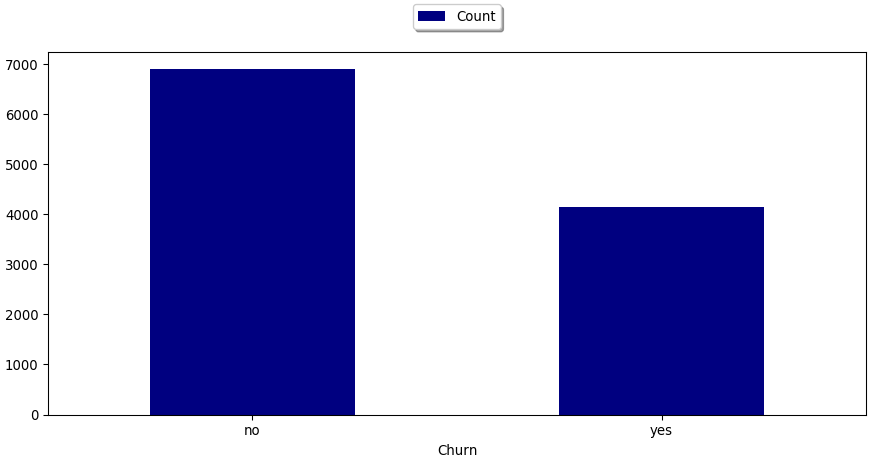

In [85]:
# Visualize results
from pixiedust.display import *
display(cleaned)


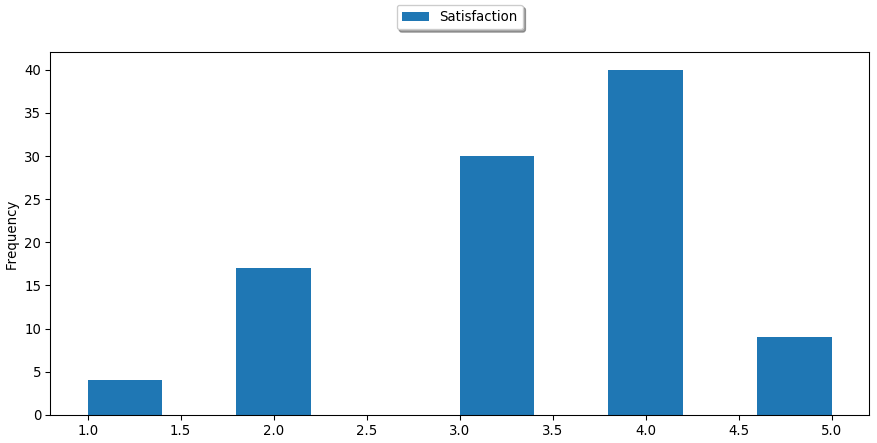

In [86]:
display(cleaned)